### Nathan Butler | 1001085566

#### First, we must load the data using pandas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# We load the data first
data = pd.read_csv("house_prices.csv")

#### 1.) Data Understanding: Print the data types of each column and use descriptive statistics to understand the data.

> ##### a.) Identify and justify the appropriateness of the data types for each attribute. Suggest changes if necessary.

> ##### b.) What does the statistical summary tell you about potential issues with data quality, such as range problems, missing values, or format inconsistencies?

> ##### c.) If there is a typo issue, fix it.

In [3]:
data.dtypes

ID              int64
Size(sqft)    float64
Bedrooms      float64
Badhrooms     float64
Location       object
House_Type     object
Year_Built    float64
Date_Sold      object
Price         float64
dtype: object

### (a) Suggested Changes:
> ##### dropna first, we do not need missing values here.
> ##### turn Bedrooms to type int
> ##### rename Badhrooms -> Bathrooms and turn to type int
> ##### turn Year_Built to type int
> ##### turn Date_Sold to datetime

In [4]:
data.describe()

,ID,Size(sqft),Bedrooms,Badhrooms,Year_Built,Price
count,110.000000,98.000000,102.000000,90.000000,99.000000,1.050000e+02
mean,55.500000,17912.581633,14.813725,12.677778,11554.797980,1.424262e+06
std,31.898276,72463.968277,65.929114,50.381874,42931.458381,1.239105e+07
min,1.000000,-4529.000000,-3.000000,-3.000000,-1991.000000,-4.494570e+07
25%,28.250000,1415.500000,2.000000,1.000000,1918.500000,2.913350e+05
50%,55.500000,2544.500000,3.000000,2.000000,1949.000000,4.535310e+05
75%,82.750000,3803.500000,5.000000,3.000000,1990.000000,7.485310e+05
max,110.000000,497400.000000,500.000000,300.000000,200800.000000,7.481430e+07


### (b) Statistical Summary:
> ##### The statistical summary tells us that there are problems with each attribute. Some are negative values and some have numbers that use natural logarithms

In [5]:
data.rename(columns={"Badhrooms": "Bathrooms"}, inplace=True)

### (c) Typo Issues:
> ##### Fixed the typos.

#### 2.) Identifying and Handling Missing Values: Identify missing values in the dataset and propose methods to handle them.

> ##### a.) What patterns of missing data did you observe in the dataset?

> ##### b.) How will you handle the missing values? Justify your approach.

In [6]:
data.isna().sum()

ID             0
Size(sqft)    12
Bedrooms       8
Bathrooms     20
Location      10
House_Type    15
Year_Built    11
Date_Sold     10
Price          5
dtype: int64

### (a) Missing Data Patterns:
> ##### In order to see if deleting any missing values would greatly change the shape of the data set, I gathered total count of missing values for each attribute.

In [7]:
data.dropna(inplace=True)

### (b) Handling Missing Data:
> #####  I decided that it would be okay to just delete the missing values because there were not many relative to the length of the data set.

#### 3.) Detecting and Correcting Invalid Entries: Identify and correct invalid entries in the dataset (e.g., negative values in columns where only positive values are appropriate, unrealistic dates, or other logical inconsistencies). Also, If there is a typo issue, fix it.

> ##### a.) What invalid entries did you find in the dataset? Provide examples.

> ##### b.) Explain the steps you took to correct these invalid entries, and justify your methods.

In [8]:
data.head()
data_pos_nums = data[
    (data['Size(sqft)'] > 0) &\
    (data['Bedrooms'] > 0) &\
    (data['Year_Built'] > 0) &\
    (data['Price'] > 0) &\
    (data['Bathrooms'] > 0) &\
    (data['Price'] < 1000000)].copy()

In [9]:
data_pos_nums
data_cleaned = data_pos_nums[
    (data_pos_nums['Bathrooms'] < 4) &\
    (data_pos_nums['Size(sqft)'] < 10000)].reset_index(drop=True)
data_cleaned_2 = data_cleaned.drop(
    index=([8,13,15,24]), axis=1).reset_index(drop=True).copy()

In [10]:
data_cleaned_2

,ID,Size(sqft),Bedrooms,Bathrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,3,157600.0,4.0,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
1,7,2562.0,3.0,1.0,Suburban,Semi-Detached,1913.0,6/10/23 00:00,210268.0
2,15,497400.0,3.0,1.0,Urban,Townhouse,1974.0,8/28/22 00:00,291335.0
3,19,700.0,1.0,2.0,Rural,Semi-Detached,1908.0,2/22/22 00:00,164820.0
4,25,3273.0,1.0,1.0,Suburban,Apartment,1906.0,1/7/21 00:00,299041.0
5,27,3190.0,6.0,3.0,Rural,Detached,1912.0,2/19/23 00:00,203355.0
6,28,4340.0,2.0,1.0,Suburban,Detached,1939.0,10/3/23 00:00,335796.0
7,29,1528.0,3.0,3.0,Suburban,Detached,1941.0,11/6/21 00:00,314176.0
8,32,1370.0,1.0,2.0,Urban,Semi-Detached,1926.0,9/1/23 00:00,521909.0
9,35,1984.0,1.0,2.0,Urban,Apartment,1904.0,1/1/22 00:00,600186.0


### (a) Invalid Entries:
> #####  I saw that there were negative values in a few of the attributes, and in the `House_Type` column, there were integer values when there should only be strings.

### (b) Correcting invalid entries:
> #####  I hard coded a bit, and filtered for values that fit within a column's range, then I manually deleted all index rows that had an integer for the `House_Type` column.

#### 4. Addressing Duplicate Records: Identify and remove duplicate records from the dataset.
> #### (a) How did you identify duplicate records in the dataset?
> #### (b) What criteria did you use to decide which duplicates to remove, if any? Justify your approach.

In [11]:
data_cleaned_2

,ID,Size(sqft),Bedrooms,Bathrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,3,157600.0,4.0,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
1,7,2562.0,3.0,1.0,Suburban,Semi-Detached,1913.0,6/10/23 00:00,210268.0
2,15,497400.0,3.0,1.0,Urban,Townhouse,1974.0,8/28/22 00:00,291335.0
3,19,700.0,1.0,2.0,Rural,Semi-Detached,1908.0,2/22/22 00:00,164820.0
4,25,3273.0,1.0,1.0,Suburban,Apartment,1906.0,1/7/21 00:00,299041.0
5,27,3190.0,6.0,3.0,Rural,Detached,1912.0,2/19/23 00:00,203355.0
6,28,4340.0,2.0,1.0,Suburban,Detached,1939.0,10/3/23 00:00,335796.0
7,29,1528.0,3.0,3.0,Suburban,Detached,1941.0,11/6/21 00:00,314176.0
8,32,1370.0,1.0,2.0,Urban,Semi-Detached,1926.0,9/1/23 00:00,521909.0
9,35,1984.0,1.0,2.0,Urban,Apartment,1904.0,1/1/22 00:00,600186.0


In [12]:
for i in data_cleaned_2.columns:
    dup = data_cleaned_2[f"{i}"].duplicated()
    print(f"Duplicates for {i}: ", dup.sum())
    

Duplicates for ID:  0
Duplicates for Size(sqft):  2
Duplicates for Bedrooms:  21
Duplicates for Bathrooms:  24
Duplicates for Location:  24
Duplicates for House_Type:  23
Duplicates for Year_Built:  3
Duplicates for Date_Sold:  2
Duplicates for Price:  2


### (a) Duplicate Entry Identification:
> #####  I used loops to try and find the number of duplicates for each column.

### (b) Duplicate Entry Handling:
> #####  I did not find any duplicate entries.

#### 5.) Data Range Issues: Identify and address any data range issues (e.g., values outside expected ranges, negative sizes, or dates in the future).

### (a) What range issues did you find in the dataset? Provide specific examples.
> #### addressed in step 3. I got rid of the negative values in the data set.

### (b) How did you address these range issues? Explain and justify your approach.
> ### I filtered out the rows using conditional statements.

#### 6.) Format Inconsistencies: Identify and correct any format inconsistencies in the dataset (e.g., inconsistent date formats, units, or text formats).

### (a) What format inconsistencies did you find in the dataset? Provide examples.
> #### I did not find any date format inconsistencies.

### (b) Explain how you standardized these formats and why it is important to do so.
> ### I did not find any date format inconsistencies.

#### 7.) 7. Misclassified Data: Detect and correct any misclassified data within the dataset (e.g., numeric data in text fields or vice versa).
### (a) What misclassified data did you identify in the dataset?
> ### I saw that there were integer values in certain columns.

### (b) How did you correct these misclassifications, and why did you choose these methods?
> #### I manually deleted indexes in step 3.

#### 8. Data Visualization: Use visualizations to identify patterns, inconsistencies, or outliers in the dataset.

In [13]:
# Which visualizations did you use to explore the data, and what insights did they provide?

In [14]:
# How did these visualizations help in identifying inconsistencies, outliers, or other data quality issues?


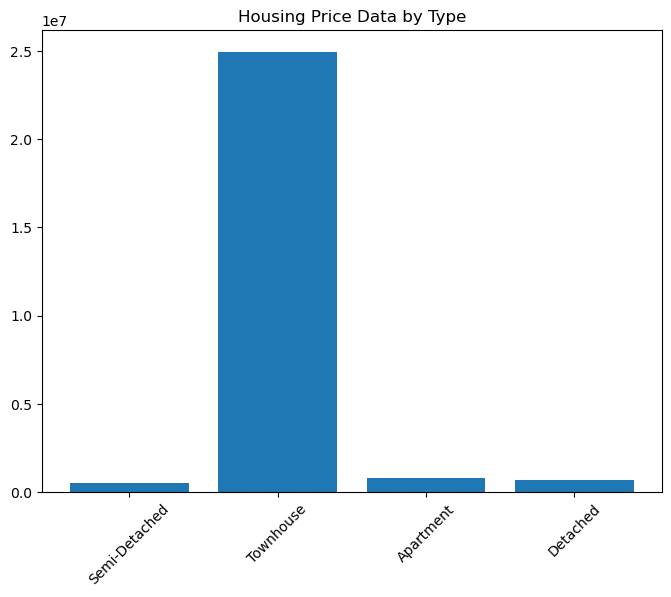

In [25]:
plt.figure(figsize=(8,6))
plt.bar(data=data_cleaned_2, x="House_Type", height="Price")
plt.title("Housing Price Data by Type")
plt.xticks(rotation=45)
plt.show()